In [2]:
'''My project is a sentiment analysis of tweets under the topic of COVID-19. Information data will be collected through 
web scraping during a period where this issue causes huge discussion. If possible, I want to make comparison between Tweets on
Twitter and microblogs on Weibo (Chinese social media with the most frequent users), to see if the news from government sources 
carries different sentiment inclinatioin and whether such inclination drives reactions of the public. '''

'My project is a sentiment analysis of tweets under the topic of COVID-19. Information data will be collected through \nweb scraping during a period where this issue causes huge discussion. If possible, I want to make comparison between Tweets on\nTwitter and microblogs on Weibo (Chinese social media with the most frequent users), to see if the news from government sources \ncarries different sentiment inclinatioin and whether such inclination drives reactions of the public. '

In [3]:
'''I want to present how different regimes are performing themselves under such a historical period. Whether two countries show
different emotional reaction are correlated with the respective characteristics of publich sphere. '''

'I want to present how different regimes are performing themselves under such a historical period. Whether two countries show\ndifferent emotional reaction are correlated with the respective characteristics of publich sphere. '

In [4]:
'''My game actors will be Chinese national media outlets which are under surveillance of the central government, Chinese social media users. American news outlets and social media users.
These can help demonstrate features of news in this two countries and how news from big media outlets construct public sphere. 
The limitation could be about research method, i.e. the proper model for sentiment analysis. An alternative could be
to study the content of news. '''

'My game actors will be Chinese national media outlets which are under surveillance of the central government, Chinese social media users. American news outlets and social media users.\nThese can help demonstrate features of news in this two countries and how news from big media outlets construct public sphere. \nThe limitation could be about research method, i.e. the proper model for sentiment analysis. An alternative could be\nto study the content of news. '

In [5]:
x  =np.loadtxt('/Users/shiyipeng/Desktop/response/Sheet 1-Table 1.txt')
#pd.DataFrame.trasnpose(x)
anno = AnnotationsContainer.from_array(x,missing_values=[2])
print(anno.annotations)
print(anno.labels)
anno.missing_values


[[1 1 1 1 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 1 1 0 1 2 1 1 1]
 [2 0 1 1 2 1 1 2 2]
 [2 2 0 2 0 2 0 2 0]
 [0 0 1 1 0 1 1 0 1]
 [0 0 0 0 0 2 0 1 1]
 [0 0 1 0 0 1 0 0 1]
 [1 1 0 0 1 1 0 1 0]
 [1 2 1 1 2 1 1 1 1]]
[-1.0, 0.0, 1.0]


[]

[0.42222222 0.43333333 0.14444444]


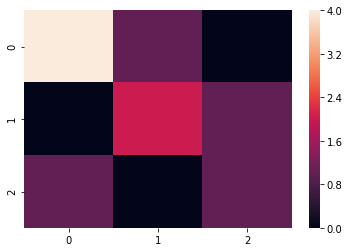

In [6]:
print(pyanno.measures.agreement.labels_frequency(anno.annotations,3))
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,1],3)
c
ac = seaborn.heatmap(c)
plt.show()

In [7]:
scotts_pi(anno.annotations[:,0], anno.annotations[:,1])


0.5161290322580646

In [8]:
fleiss_kappa(anno.annotations[::])

0.1753926701570681

In [9]:
krippendorffs_alpha(anno.annotations[::])

0.2199873896595208

In [10]:
cohens_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.5161290322580646

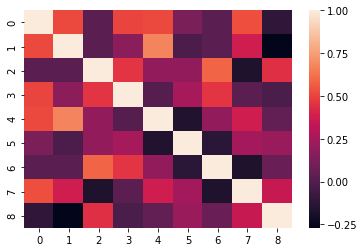

In [11]:
m = pairwise_matrix(cohens_kappa, anno.annotations)
m
ax = seaborn.heatmap(m)
plt.show()

In [12]:
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,x[0]], array[:,x[1]]) for x in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)    
 
pairwise_metric_average(cohens_kappa, anno.annotations)

0.18560617149105824

In [13]:
cohens_weighted_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.5121951219512195

In [14]:
pairwise_metric_average(cohens_weighted_kappa,anno.annotations)

0.19681190759812

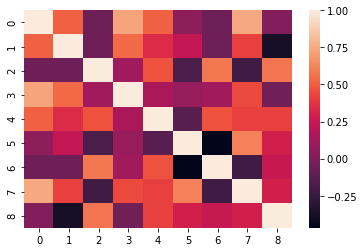

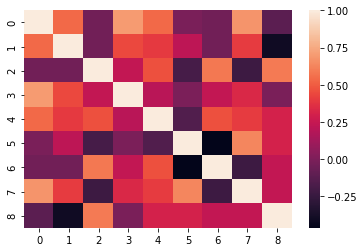

In [15]:
n = pairwise_matrix(pearsons_rho, anno.annotations)
m = pairwise_matrix(spearmans_rho, anno.annotations)
an = seaborn.heatmap(n)
plt.show()
am = seaborn.heatmap(m)
plt.show()

In [16]:
print(pairwise_metric_average(pearsons_rho,anno.annotations), pairwise_metric_average(spearmans_rho,anno.annotations))

0.21042397343870267 0.19953195958287476


In [17]:
model = ModelB.create_initial_state(3, 9)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[0.62546262 0.24339508 0.1311423 ]
  [0.19997347 0.74917375 0.05085278]
  [0.19513709 0.17572331 0.6291396 ]]

 [[0.81380737 0.09792175 0.08827088]
  [0.13099781 0.52797935 0.34102284]
  [0.15678636 0.09994953 0.74326411]]

 [[0.76254907 0.16011296 0.07733798]
  [0.31548321 0.55395757 0.13055922]
  [0.30404057 0.20159564 0.49436379]]

 [[0.69211457 0.09971971 0.20816572]
  [0.03931068 0.64155696 0.31913237]
  [0.06459711 0.27153822 0.66386466]]

 [[0.78822595 0.1321989  0.07957515]
  [0.19012631 0.57808521 0.23178848]
  [0.11840291 0.11132265 0.77027444]]

 [[0.8091284  0.10164366 0.08922795]
  [0.11124163 0.67517821 0.21358016]
  [0.16724349 0.12052226 0.71223425]]

 [[0.67155246 0.22948108 0.09896645]
  [0.2039139  0.72980889 0.06627721]
  [0.05512548 0.10081016 0.84406436]]

 [[0.7867922  0.15041341 0.06279439]
  [0.0545831  0.85886925 0.08654764]
  [0.06440215 0.14828863 0.78730923]]

 [[0.77995359 0.1286154  0.09143101]
  [0.14420328 0.7413366  0.11446013]
  [0.08520674 0.121900

In [18]:
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[0.81326182 0.14180781 0.04493037]
  [0.17642329 0.67434137 0.14923533]
  [0.04988287 0.14965203 0.8004651 ]]

 [[0.81316285 0.14190997 0.04492718]
  [0.17403099 0.67425724 0.15171177]
  [0.05314444 0.14964788 0.79720769]]

 [[0.76272763 0.1929353  0.04433707]
  [0.14453182 0.74182471 0.11364347]
  [0.09885017 0.15291417 0.74823566]]

 [[0.80638067 0.14869232 0.04492701]
  [0.1823023  0.70386348 0.11383423]
  [0.04988311 0.15291376 0.79720313]]

 [[0.81374942 0.14190997 0.04434061]
  [0.13882063 0.67425724 0.18692213]
  [0.09884993 0.14964788 0.75150219]]

 [[0.70970442 0.20100456 0.08929102]
  [0.15125859 0.69704939 0.15169203]
  [0.04988243 0.15291401 0.79720357]]

 [[0.76253229 0.19313064 0.04433707]
  [0.14469871 0.74165782 0.11364347]
  [0.09885017 0.15291417 0.74823566]]

 [[0.76921023 0.1858594  0.04493037]
  [0.17617968 0.67458498 0.14923533]
  [0.04988248 0.14965242 0.8004651 ]]

 [[0.71877837 0.2368812  0.04434043]
  [0.18208162 0.6688738  0.14904458]
  [0.09885018 0.149652

In [19]:
posterior = model.infer_labels(anno.annotations)
print(posterior)

[[7.04650277e-03 9.92952512e-01 9.85492074e-07]
 [9.99975529e-01 2.44699811e-05 5.70801878e-10]
 [2.30804213e-03 9.97683781e-01 8.17663948e-06]
 [7.58792318e-05 9.34531015e-01 6.53931056e-02]
 [1.33057541e-02 5.03560499e-03 9.81658641e-01]
 [3.46550238e-01 6.53448762e-01 9.99945333e-07]
 [9.98299690e-01 1.69963429e-03 6.75985225e-07]
 [9.95569773e-01 4.43019853e-03 2.82917454e-08]
 [1.91352557e-01 8.08641651e-01 5.79203505e-06]
 [3.91526331e-06 9.99904662e-01 9.14226253e-05]]


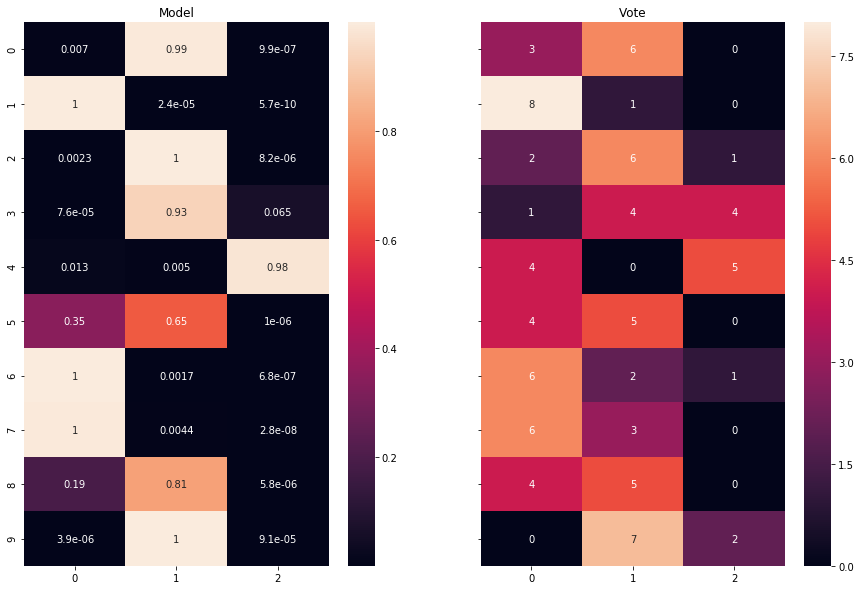

In [20]:
votes = []
for r in anno.annotations:
    v = [0] * len(anno.labels)
    votes.append(v)
    for a in r:
        if a > -1:
            v[a] += 1
votes_array = np.array(votes)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 10), sharey=True)
num_questions = 20

seaborn.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
seaborn.heatmap(posterior[:num_questions], annot=True, ax =ax1)
ax1.set_title("Model")
ax2.set_title("Vote")
plt.show()

In [21]:
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
print(samples[0].mean(axis=0))
print(samples[0].std(axis=0))

[[[0.74404373 0.17139718 0.08455909]
  [0.19210391 0.6514948  0.15640129]
  [0.08794233 0.17565492 0.73640275]]

 [[0.74157759 0.17001579 0.08840662]
  [0.18364548 0.64291037 0.17344415]
  [0.09190858 0.17766145 0.73042997]]

 [[0.71182916 0.21622625 0.07194459]
  [0.15752994 0.70136292 0.14110714]
  [0.11719204 0.18389501 0.69891295]]

 [[0.73269409 0.17407833 0.09322758]
  [0.19699848 0.67140868 0.13159283]
  [0.09131693 0.18128866 0.72739441]]

 [[0.74856144 0.17636596 0.0750726 ]
  [0.16398086 0.62959409 0.20642505]
  [0.11241336 0.17965946 0.70792718]]

 [[0.6519381  0.22472943 0.12333247]
  [0.16901211 0.6622102  0.16877769]
  [0.07575242 0.18270484 0.74154274]]

 [[0.70528252 0.21528342 0.07943406]
  [0.1606256  0.70605297 0.13332143]
  [0.12301485 0.18315063 0.69383452]]

 [[0.70971852 0.20547509 0.08480639]
  [0.19747867 0.63708431 0.16543702]
  [0.09010001 0.17846874 0.73143126]]

 [[0.68313791 0.23828679 0.0785753 ]
  [0.18940717 0.64007384 0.17051898]
  [0.11353951 0.166907

In [22]:
model = ModelBt.create_initial_state(3, 9)
model.map(anno.annotations)
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
y =  samples.mean(axis=0)
y_ci = samples.std(axis=0)


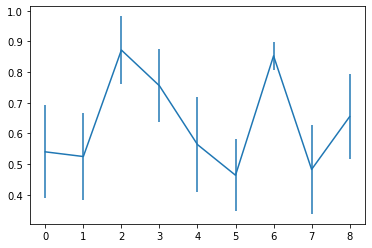

In [23]:
plt.figure()
plt.errorbar(range(9),y, yerr = y_ci)
plt.show()

In [24]:
'''The measurements above show that there is a weak inter-agreement for my model. The reliabity is not very strong. I may need to invite more coders to make amendments to my sentences.
The coder 3 and coder 7, with higher accuracy and smaller credible interva. '''



'The measurements above show that there is a weak inter-agreement for my model. The reliabity is not very strong. I may need to invite more coders to make amendments to my sentences.\nThe coder 3 and coder 7, with higher accuracy and smaller credible interva. '